<a href="https://colab.research.google.com/github/priyasa399/Mini-Project-Fake_News_Detection/blob/fake_news/Mini_Project_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive'

/content/drive


In [ ]:
cd 'My Drive'

/content/drive/My Drive


In [ ]:
cd 'Fake_News_Dataset'

/content/drive/My Drive/Fake_News_Dataset


In [ ]:
pwd

'/content/drive/MyDrive/Fake_News_Dataset'

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle
import os

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# For Splitting the dataset
from sklearn.model_selection import train_test_split

# Model libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Accuracy measuring library
from sklearn.metrics import accuracy_score

### Loading the Dataset

In [ ]:
fake = pd.read_csv('/content/drive/My Drive/Fake_News_Dataset/Fake.csv', delimiter = ',')
true = pd.read_csv('/content/drive/My Drive/Fake_News_Dataset/True.csv', delimiter = ',')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Data-Preprocessing

True.csv and fake.csv are merged into one single dataset with an additional column named 'sentiment'. Fake news is indicated by a sentiment score of 0 and real news is indicated by a sentiment score of 1. Also, irrelevant columns are dropped.

In [ ]:
fake['sentiment']= 0
true['sentiment']= 1

dataset =pd.DataFrame()
dataset = true.append(fake)

In [ ]:
column = ['date','subject']
dataset = dataset.drop(columns=column)
input_array=np.array(dataset['title'])

### Text Processing

We remove stopwords, punctuations, special characters etc and the words are stemmed to their root word. Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information. 

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 40000):
    review = re.sub('[^a-zA-Z]', ' ', input_array[i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Bag of Word Model

A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[0:40000, 2].values

### Splitting Dataset into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Support Vector Machines (SVM)

In [ ]:
#2. Support Vector Machine(SVM) 
svm_model = SVC(kernel='linear')

#Fitting training set to the model
svm_model.fit(X_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(X_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)
print('Accuracy of SVM model is ', score)

Accuracy of SVM model is 0.94249


### Saving SVM Model

In [ ]:
pickle.dump(svm_model, open('svm_model.sav','wb'))

#### Loading SVM Model

In [ ]:
model = pickle.load(open('svm_model.sav','rb'))

##### **Predict()**

Python predict() function enables us to predict the labels of the data values on the basis of the trained model.


The predict() function accepts only a single argument which is usually the data to be tested.
It returns the labels of the data passed as argument based upon the learned or trained data obtained from the model.

Thus, the predict() function works on top of the trained model and makes use of the learned label to map and predict the labels for the data to be tested.

In [ ]:
svm_y_pred = model.predict(X_test)

### Confusion Matrix for SVM Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, svm_y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['true','false'], 
                     columns = ['true','false'])


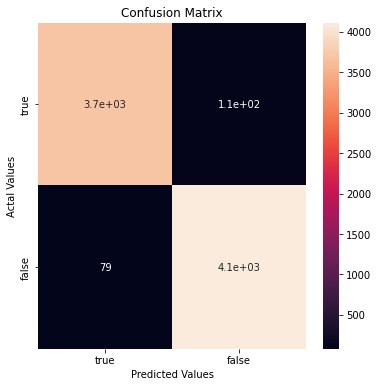

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Evaluating the performance of SVM Model on Test set

In [ ]:
if svm_y_pred[700] == 0:
  print("Prediction: Fake News")
else:
  print("prediction: Real News")
if y_test[700] == 0:
  print("Reality: Fake News")
else:
  print("Reality: Real News")


prediction: Real News
Reality: Real News


In [ ]:
if svm_y_pred[230] == 0:
  print("Prediction: Fake News")
else:
  print("prediction: Real News")
if y_test[230] == 0:
  print("Reality: Fake News")
else:
  print("Reality: Real News")

Prediction: Fake News
Reality: Fake News


In [ ]:
if svm_y_pred[57] == 0:
  print("Prediction: Fake News")
else:
  print("prediction: Real News")
if y_test[57] == 0:
  print("Reality: Fake News")
else:
  print("Reality: Real News")

prediction: Real News
Reality: Real News


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_predR = classifier3.predict(X_test)
score = accuracy_score(y_test,y_predR)
print('Accuracy of Random Forest Classification model is ', score)


Accuracy of Random Forest Classification model is  0.922125


### Saving The model

In [ ]:
pickle.dump(classifier3, open('random_forest.sav','wb'))

### Loading the Model

In [ ]:
rand_forest = pickle.load(open('random_forest.sav','rb'))

In [ ]:
rand_y_pred = rand_forest.predict(X_test)

### Confusion Matrix for random forest classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, rand_y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['true','false'], 
                     columns = ['true','false'])

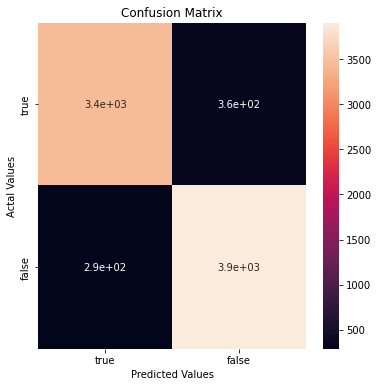

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Evaluating the performance of random forest classifier on test set

In [ ]:
if rand_y_pred[320] == 0:
  print("Prediction: Fake News")
else:
  print("prediction: Real News")
if y_test[320] == 0:
  print("Reality: Fake News")
else:
  print("Reality: Real News")


prediction: Real News
Reality: Real News


In [ ]:
if rand_y_pred[500] == 0:
  print("Prediction: Fake News")
else:
  print("prediction: Real News")
if y_test[500] == 0:
  print("Reality: Fake News")
else:
  print("Reality: Real News")


Prediction: Fake News
Reality: Fake News


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_predD = classifier2.predict(X_test)
score = accuracy_score(y_test,y_predD)
print('Accuracy of Decision Tree Classification model is ', score)


Accuracy of Decision Tree Classification model is  0.90075


### Saving the model

In [ ]:
pickle.dump(classifier2, open('decision_tree.sav','wb'))

### Loading the model

In [ ]:
decision_tree = pickle.load(open('decision_tree.sav','rb'))

In [ ]:
deci_y_pred = decision_tree.predict(X_test)

### Confusion Matrix for Decision Tree Classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, deci_y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['true','false'], 
                     columns = ['true','false'])

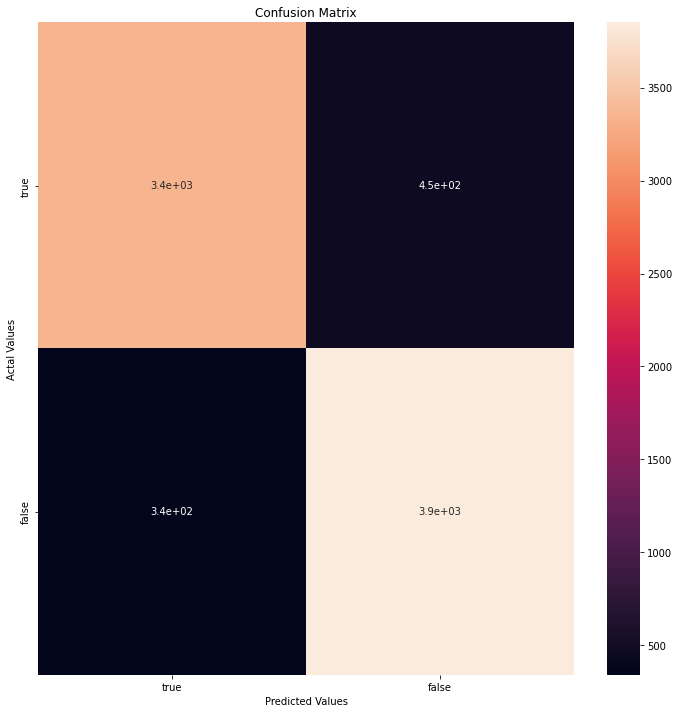

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Evaluating the performance of Decision Tree Classifier on Test set

In [ ]:
if deci_y_pred[517] == 0:
  print("Prediction: Fake News")
else:
  print("prediction: Real News")
if y_test[517] == 0:
  print("Reality: Fake News")
else:
  print("Reality: Real News")


prediction: Real News
Reality: Real News


In [ ]:
if deci_y_pred[189] == 0:
  print("Prediction: Fake News")
else:
  print("prediction: Real News")
if y_test[189] == 0:
  print("Reality: Fake News")
else:
  print("Reality: Real News")


Prediction: Fake News
Reality: Fake News


### XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train, y_train)

preds = xgb_cl.predict(X_test)

score = accuracy_score(y_test, preds)
print('Accuracy of XGBoost model is ', score)

Accuracy of XGBoost model is  0.84075


### Saving the model

In [ ]:
pickle.dump(xgb_cl, open('xgboost.sav','wb'))

### Loading the model

In [ ]:
xgboost = pickle.load(open('xgboost.sav','rb'))

In [ ]:
xgboost_y_pred = xgboost.predict(X_test)

### Confusion Matrix for XGBoost

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, xgboost_y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['true','false'], 
                     columns = ['true','false'])

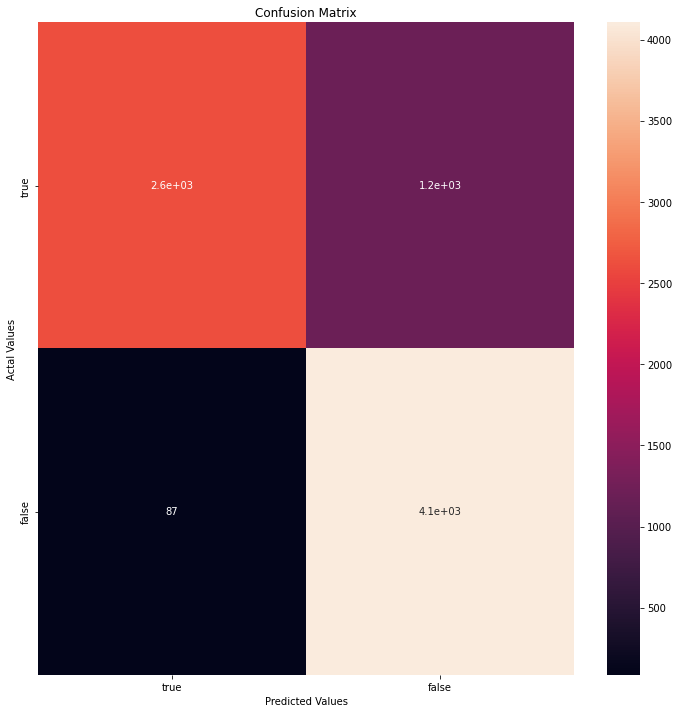

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Evaluating the performance of XGBoost on test set

In [ ]:
if xgboost_y_pred[457] == 0:
  print("Prediction: Fake News")
else:
  print("prediction: Real News")
if y_test[457] == 0:
  print("Reality: Fake News")
else:
  print("Reality: Real News")

prediction: Real News
Reality: Real News


In [ ]:
if xgboost_y_pred[266] == 0:
  print("Prediction: Fake News")
else:
  print("prediction: Real News")
if y_test[266] == 0:
  print("Reality: Fake News")
else:
  print("Reality: Real News")


prediction: Real News
Reality: Real News


### Testing the performance of the model on external data

In [ ]:
news = 'JetNation FanDuel League; Week 4 of readers think this story is Fact. Add your two cents.(Before Its News)Our FanDuel league is back again this week. Here are the details:$900 in total prize money. $250 to the winner. $10 to enter.Remember this is a one week league, pick your lineup against the salary cap and next week if you want to play again you can pick a completely different lineup if you want.Click this link to enter — http://fanduel.com/JetNation You can discuss this with other NY Jets fans on the Jet Nation message board. Or visit of on Facebook.Source: http://www.jetnation.com/2017/09/27/jetnation-fanduel-league-week-4/'
input_data = {"title":[news]}
new_def_test = pd.DataFrame(input_data)
corpus = []
review = re.sub('[^a-zA-Z]',' ',news)
review = review.lower()
review = review.split()
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
review = ' '.join(review)
corpus.append(review)
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
from sklearn import *
X.resize((1,5000),refcheck=False)
prediction = model.predict(X)
if prediction == 0:
  print("Fake news")
else:
  print("Real news")

Fake news
